In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

## Estimacion Basica (Vainilla)

#### cargar datos

In [73]:
data = pd.read_csv("../data/casas-california.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### visualizar casa de california

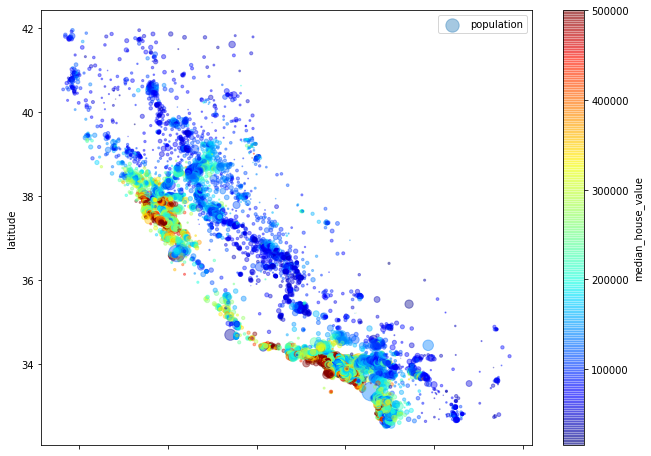

In [74]:
data.plot(kind ="scatter", x ="longitude", y ="latitude", alpha = 0.4,
             s = data["population"] / 100, label ="population", figsize =(11,8),
             c ="median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, ) 
plt.legend()

#### correlaciones

In [75]:
### EJERCICIO: (1pt) 
# utilize matplotlib para desplegar la matriz de correlaciones

corr = data.corr()

# Desplegar la matriz de correlaciones con pandas
corr.style.background_gradient(cmap='plasma').set_precision(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00


In [76]:
### EJERCICIO: (1pt) 
# despliegue las correlaciones de la variable median_house_value
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### limpieza de datos

<AxesSubplot:>

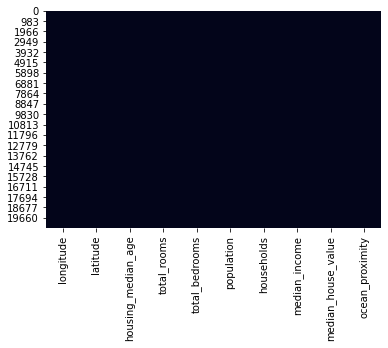

In [77]:
### EJERCICIO: (1pt)
# utilize seaborn para revisar de que no hay valores en blanco. despliegue el grafico de seaborn.

data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

sns.heatmap(data.isnull(), cbar=False)

In [78]:
### EJERCICIO: (1pt)
# Revise los tipos de las columnas y verifique que cada uno esta definido correctamente 
# (ejemplo, la variable OCEAN_PROXIMITY debe ser categorica)

enc = OrdinalEncoder()
enc.fit(data[["ocean_proximity"]])
data[["ocean_proximity"]] = enc.transform(data[["ocean_proximity"]])

#### test & training set

In [79]:
### EJERCICIO: (1pt) 
# separe el dataset train:80%, test:20%, random_state=42 
# donde y = median_house_value

y = data.median_house_value
X = data.loc[:, data.columns != 'median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#### regresion lineal multiple

In [80]:
### EJERCICIO: (1pt)
# estime el modelo de regresion lineal utilizando Sklearn.
# imprima los coeficientes

model = LinearRegression().fit(X.values, y.values)

print("Coeficientes:")
print("b",0,":","%.2f"%model.intercept_)
for i,b in zip(np.arange(1,len(model.coef_)+1), model.coef_):
    print("b",i,":", "%.2f"%b)

Coeficientes:
b 0 : -3566374.67
b 1 : -42570.33
b 2 : -42448.86
b 3 : 1144.16
b 4 : -6.63
b 5 : 81.14
b 6 : -39.85
b 7 : 79.33
b 8 : 39758.36
b 9 : 71.03


In [81]:
### EJERCICIO: (1pt)
# utilize statsmodels para estimar las estadisticas del modelo actual.
# estime el MSE del train/test

y_prima_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_prima_train)

y_prima_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_prima_test)


print("MSE Train:",np.sqrt(mse_train))
print(" MSE Test:",np.sqrt(mse_test))

print("\n"*2)

model_ols = sm.OLS(y_train, sm.add_constant(X_train))
pred = model_ols.fit()
print(pred.summary())

MSE Train: 69409.02858324713
 MSE Test: 70645.73943193094



                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3261.
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:54:51   Log-Likelihood:            -2.0749e+05
No. Observations:               16512   AIC:                         4.150e+05
Df Residuals:                   16502   BIC:                         4.151e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## Estimacion Avanzada - Feature Engineering

En este momento, ud acaba de realizar la estimación del modelo más básico, sin aplicar transformaciones, ni escalamientos a las variables. 

**Aqui es donde se pone bonito...**

En esta sección debe estudiar las variables, sus distribuciones, para identificar qué tipo de cosas se pueden realizar para mejorar el modelo. Vuelva a calcular las estadísticas del modelo (antes y después) para que tenga un punto de referencia.

Algunas recomendaciones:
- Trate de comprender el rol de la variable en la prediccion. Tiene sentido?
- Algunos modelos trabajan mejor con menos variables. (aqui puede agregar o remover variables)
- Aplique transformaciones para "normalizar" variables (que tengan una distribucion quasi-normal)
- considere crear nuevas variables de ser necesario: por ejemplo bedrooms_per_room = data["total_bedrooms"] / data["total_rooms"]

In [231]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones

# seleccion de variables
data2 = data.loc[::, ['median_income', 'longitude', 'latitude', 'median_house_value','housing_median_age']]

# variable categorica
dummies = pd.get_dummies(data.ocean_proximity, prefix="OP")
data2 = data2.join(dummies)

# se crean nuevas variables
data2["households_per_population"] = data["households"] / data["population"]
data2["bedrooms_per_total_rooms"] = data["total_bedrooms"] / data["total_rooms"]

In [232]:
### EJERCICIO: (1pt)
# Estime nuevamente el modelo de regresion lineal

y = data2.median_house_value
X = data2.loc[:, data2.columns != 'median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

model = LinearRegression().fit(X, y.values)

print("Coeficientes:")
print("b",0,":","%.2f"%model.intercept_)
for i,b in zip(np.arange(1,len(model.coef_)+1), model.coef_):
    print("b",i,":", "%.2f"%b)

Coeficientes:
b 0 : -2380710.29
b 1 : 39649.56
b 2 : -27309.26
b 3 : -26928.20
b 4 : 871.07
b 5 : -19050.25
b 6 : -55162.43
b 7 : 122658.55
b 8 : -27155.46
b 9 : -21290.42
b 10 : 311265.72
b 11 : 100920.52


In [233]:
corr = data2.corr()

# Desplegar la matriz de correlaciones con pandas
corr.style.background_gradient(cmap='plasma').set_precision(2)

,median_income,longitude,latitude,median_house_value,housing_median_age,OP_0.0,OP_1.0,OP_2.0,OP_3.0,OP_4.0,households_per_population,bedrooms_per_total_rooms
median_income,1.00,-0.02,-0.08,0.69,-0.12,0.17,-0.24,-0.01,0.06,0.03,-0.01,-0.55
longitude,-0.02,1.00,-0.92,-0.05,-0.11,0.32,-0.06,0.01,-0.47,0.05,-0.14,0.08
latitude,-0.08,-0.92,1.00,-0.14,0.01,-0.45,0.35,-0.02,0.36,-0.16,0.12,-0.10
median_house_value,0.69,-0.05,-0.14,1.00,0.11,0.26,-0.48,0.02,0.16,0.14,0.26,-0.23
housing_median_age,-0.12,-0.11,0.01,0.11,1.00,0.05,-0.24,0.02,0.26,0.02,0.02,0.14
OP_0.0,0.17,0.32,-0.45,0.26,0.05,1.00,-0.61,-0.01,-0.31,-0.34,-0.12,0.06
OP_1.0,-0.24,-0.06,0.35,-0.48,-0.24,-0.61,1.00,-0.01,-0.24,-0.26,-0.06,-0.10
OP_2.0,-0.01,0.01,-0.02,0.02,0.02,-0.01,-0.01,1.00,-0.01,-0.01,0.01,0.01
OP_3.0,0.06,-0.47,0.36,0.16,0.26,-0.31,-0.24,-0.01,1.00,-0.14,0.16,0.00
OP_4.0,0.03,0.05,-0.16,0.14,0.02,-0.34,-0.26,-0.01,-0.14,1.00,0.11,0.03


In [234]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
households_per_population    0.264910
OP_0.0                       0.256617
OP_3.0                       0.160284
OP_4.0                       0.141862
housing_median_age           0.105623
OP_2.0                       0.023416
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_total_rooms    -0.233303
OP_1.0                      -0.484859
Name: median_house_value, dtype: float64

In [235]:
### EJERCICIO: (1pt)
# Calcule nuevamente las estadisticas para determinar si hay mejoras sobre el modelo.
# estime el MSE del train/test

y_prima_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_prima_train)

y_prima_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_prima_test)


print("MSE Train:",np.sqrt(mse_train))
print(" MSE Test:",np.sqrt(mse_test))

print("\n"*2)

model_ols = sm.OLS(y_train, sm.add_constant(X_train))
pred = model_ols.fit()
print(pred.summary())

MSE Train: 65702.948405162
 MSE Test: 67176.70743333136



                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3474.
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:57:01   Log-Likelihood:            -2.0657e+05
No. Observations:               16512   AIC:                         4.132e+05
Df Residuals:                   16501   BIC:                         4.133e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
# Prueba con Arboles de Regression con K-Fold Cross Validation

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
scores = np.sqrt(-scores)

scores.mean()

69593.6698835219